In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import re
import scipy.optimize as opt
from tqdm import tqdm
import sympy as sp
from sympy.parsing.sympy_parser import parse_expr
from sympy import lambdify

In [2]:
t_eq=pd.read_csv('/data/zj448/SR/Ultimate_paper/pareto_archive/pareto_archive.csv')
#t_eq = t_eq.iloc[30000:30100]
#t_eq = t_eq.iloc[:3]
t_eq = t_eq.iloc[2663:2665]



df_full = pd.read_csv('SMBH_Data_01_22_24.csv',header=1)

In [42]:
t_eq=pd.read_csv('/data/zj448/SR/Ultimate_paper/pareto_archive/pareto.csv')

# randomly pick 1000 rows from t_eq as the new t_eq
t_eq = t_eq.sample(n=100, random_state=1)
t_eq

,complexity,loss,score,equation,sympy_format,lambda_format,number_constants,variables,number_variables,unique_number_variables,log_like,aic,evolutions,iterations
9486,15,0.020197,0.139136,(((x15 / 0.2781055358753451) + x19) - (log10((...,3.595757261186734*x15 + x19 - log((x2 + exp(x4...,PySRFunction(X=>3.595757261186734*x15 + x19 - ...,2,"{'x42', 'x19', 'x2', 'x15', 'x21'}",5,5,-1.878345,7.756689,0,765
2664,1,0.683744,0.000000,8.378707669144019,8.378707669144019,PySRFunction(X=>8.378707669144019),1,set(),0,0,-63.588224,129.176447,0,208
21126,4,0.115187,0.184676,(log10(x15) * 23.417802588815807),23.417802588815807*log(x15)/log(10),PySRFunction(X=>23.417802588815807*log(x15)/lo...,1,{'x15'},1,1,-10.712431,23.424861,0,1805
18464,4,0.115187,0.184676,(log10(x15) * 23.417802588815807),23.417802588815807*log(x15)/log(10),PySRFunction(X=>23.417802588815807*log(x15)/lo...,1,{'x15'},1,1,-10.712431,23.424861,0,1563
29175,19,0.015566,0.113730,((((x15 / 0.2928557769080886) + x19) - log10((...,3.414650073007934*x15 + x19 - log(-0.768482453...,PySRFunction(X=>3.414650073007934*x15 + x19 - ...,3,"{'x42', 'x9', 'x19', 'x15', 'x52', 'x21'}",6,6,-1.447681,8.895362,0,2461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28838,17,0.019542,0.016484,(((x15 / 0.2781055358753451) + x19) - (log10((...,3.595757261186734*x15 + x19 - log((x2 + x8 + e...,PySRFunction(X=>3.595757261186734*x15 + x19 - ...,2,"{'x42', 'x19', 'x2', 'x15', 'x21', 'x8'}",6,6,-1.817431,7.634861,0,2433
22605,5,0.072878,0.457771,((x39 + 7.38972889905906) - x42),x39 - x42 + 7.38972889905906,PySRFunction(X=>x39 - x42 + 7.38972889905906),1,"{'x42', 'x39'}",2,2,-6.777672,15.555344,0,1929
7703,4,0.115187,0.184676,(log10(x15) * 23.417802588815807),23.417802588815807*log(x15)/log(10),PySRFunction(X=>23.417802588815807*log(x15)/lo...,1,{'x15'},1,1,-10.712431,23.424861,0,613
21103,3,0.138551,0.798174,(x12 + -2.3924491314251446),x12 - 2.3924491314251446,PySRFunction(X=>x12 - 2.3924491314251446),1,{'x12'},1,1,-12.885220,27.770440,0,1803


In [4]:
low_scatter_para=['ETG','T-type','Bar', 'Disk', 'Ring', 'Core', 'Multiple', 'Compactness', 'AGN',
       'Pseudobulge', 'BCG', 'cD','M*_sph', 'M*_gal', 'log_B/T',
       'log_sigma0', 'log_R_e_sph_maj','log_R_e_sph_eq_kpc', 'log_n_sph_maj', 'log_n_sph_eq', 'log(I_e,sph,maj/M_Sun/pc^2)',
       'log(I_e,sph,eq/M_Sun/pc^2)', 'Concentration_Index',
       'avg_Rho_1kpc_Exact_All', 'r1_density_approx', 'log10(R10_kpc)',
       'logRho_R10_approx', 'log_rho10_Exact', 'log10(R90_kpc)',
       'logRho_R90_approx', 'log_rho_90_Exact_all', 'Rho_re_spatial',
       'SR_pc_All', 'Rho_SR_pc_All', 'CR_def1_approx_new',
       'Rho_cr_def1_approx_new', 'CR_def2_approx_new',
       'Rho_CR_def2_approx_new', 'Sr(pc)_2_using_Falserm_drho',
       'Log_Approx_Avg_density_10pc', 'log_Rho_e_Exact_new',
       'logRho_e_approx_New', 'logRho_soi_approx_new',
       'log_Rho_soi_exact_new', 'Avg_Rho_Re_Exact_all',
       'Avg_Rho_soi_exact_all', 'Avg_Rho_re_Exact_all', 'Rho_re_Exact_all',
       'Rho_r_soi_2BH_approx', 'Log_Avg_Rho_10kpc_approx',
       'Log_Avg_Rho_10kpc_exact_final', 'Log_Avg_Rho_100pc_approx',
       'Log_Avg_Rho_5kpc_approx', 'Log_Avg_rho_5kpc_exact_all', 'ube', 'bve',
       'dc', 'bvtc', 'bri25', 'mabs', 'blum', 'logblum', 'logSigma0sph',
       'LogSigma0', 'R10', 'logR10', 'logR10phi', 'Rh', 'logRh', 'logRhphi',
       'logHalo','B-V','V-[3.6]','GJC23W1-W2','GJC23W2-W3','GJC23log(M*,gal/M_sun)',
       'GJC23log(SFR)','GJC23log(sSFR)','M_BH']
low_scatter_para.append('M_BH_std_sym')

In [5]:
df=df_full[low_scatter_para]
df=df.dropna()
df

,ETG,T-type,Bar,Disk,Ring,Core,Multiple,Compactness,AGN,Pseudobulge,...,logHalo,B-V,V-[3.6],GJC23W1-W2,GJC23W2-W3,"GJC23log(M*,gal/M_sun)",GJC23log(SFR),GJC23log(sSFR),M_BH,M_BH_std_sym
1,1,-4.8,0,0.0,0,1.0,0,0,1.0,0,...,13.959319,0.966,3.84,-0.05,0.39,11.24,-0.763463,-12.003463,9.380211,0.180956
3,1,-4.9,0,0.0,0,0.0,0,0,1.0,0,...,14.060462,0.954,3.36,-0.08,0.02,11.47,-1.002614,-12.472614,9.102971,0.086075
6,1,-2.8,0,1.0,0,0.0,0,0,0.0,0,...,11.525458,0.889,2.77,0.03,1.28,8.85,-1.514279,-10.364279,5.740000,0.103967
7,1,-1.2,0,1.0,0,1.0,0,0,0.0,0,...,13.405242,0.977,3.13,-0.02,0.52,11.10,-1.059982,-12.159982,8.677184,0.099526
9,1,-4.8,0,0.0,0,0.0,0,0,0.0,0,...,12.727499,0.893,2.90,-0.04,0.27,10.64,-1.007889,-11.647889,7.591065,0.194876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,0,1.1,0,1.0,0,0.0,0,0,1.0,0,...,13.218697,0.935,3.11,-0.02,0.90,11.06,-0.485452,-11.545452,8.808460,0.027143
132,0,2.9,1,1.0,0,0.0,0,0,0.0,1,...,13.233744,0.860,3.24,0.00,2.20,11.06,0.202434,-10.857566,8.279168,0.052000
133,0,2.3,0,1.0,1,0.0,0,0,1.0,1,...,12.289895,0.735,3.48,0.02,2.71,10.38,-0.082862,-10.462862,6.833669,0.101335
134,0,2.2,0,1.0,0,0.0,0,0,1.0,1,...,12.536387,0.803,3.31,0.02,2.21,10.54,-0.141944,-10.681944,6.198130,0.108574


In [6]:
def predict(equation):
    func=str2equ(equation)
    labels = re.findall(r'x(\d+)', equation)
    labels = [int(label) for label in labels]

    x=[]
    for i in range(len(labels)):
        x.append(df[low_scatter_para[labels[i]]])

    return func(*x)

def str2equ(equation):
    return lambdify(re.findall(r'\bx\d+',equation),equation)

In [18]:
t_eq['LLL']=0.
t_eq['intrinsic_scatter']=0.
#t_eq['refit_equation']=''


number_matching_pattern = r"(?<![a-zA-Z0-9_.])[+-]?(\d+\.\d+|\.\d+|\d+\.|\d+)(?:[eE][-+]?\d+)?"
swap_operator_list = {'log10':'np.log10','exp':'np.exp','pow':'**'}

def str2equ2(equation):
    return eval("lambda "+", ".join(re.findall(r'\bx\d+', equation))+f": {equation}")


for row in tqdm(t_eq.iterrows(),total=len(t_eq)):

    equation = row[1]['equation']
    #print(equation)

    # swap constants
    constants = re.findall(number_matching_pattern, equation)
    variable_list=[]
    for i in range(len(constants)):
        variable_list.append('p['+str(i)+']')

    for i in range(len(constants)):
        equation = equation.replace(constants[i],variable_list[i])

    #print(constants)
    #print(equation)


    # if any of keys in swap_operator_list is in equation, replace it with the value
    for key, value in swap_operator_list.items():
        equation = equation.replace(key, value)

    labels = re.findall(r'x(\d+)', equation)
    labels = [int(label) for label in labels]

    x=[]
    for i in range(len(labels)):
        x.append(df[low_scatter_para[labels[i]]])

    mu_obs = df['M_BH']

    sigma_y_obs2 = df['M_BH_std_sym']*df['M_BH_std_sym']

    ##############################
    def loglikelihood(p):

        equation_=equation
        for i in range(len(variable_list)):
            equation_ = equation_.replace(variable_list[i],str(p[i]))

        #func=eval("lambda "+", ".join(re.findall(r'\bx\d+', equation_))+f": {equation_}")
        func = str2equ2(equation_)

        mu_pred = func(*x)
        sigma_y =  np.sqrt(sigma_y_obs2 + p[-1]*p[-1])
        #sigma_y =  np.sqrt(sigma_y_obs2)
        norm_residuals = (mu_obs - mu_pred) / sigma_y

        log_l = -0.5*len(df)*np.log(2*np.pi) -np.log(sigma_y).sum() - 0.5*(norm_residuals*norm_residuals).sum()

        return -log_l
    ###############################

    current_parameter_vector=np.array(np.float64(constants))
    current_parameter_vector=np.append(current_parameter_vector,0.3) # last p is intrinsic scatter

    #print(-loglikelihood(current_parameter_vector))
    try:
        result = opt.minimize(loglikelihood, current_parameter_vector, method='Nelder-Mead', tol=1e-7, options={'maxiter':5e5, 'maxfev':5e5, 'adaptive':True})
        #lll.append(-loglikelihood(result.x))
        #intrinsic_scatter.append(result.x[-1])
        #t_eq.loc[row[0],'LLL']=-loglikelihood(result.x)
        t_eq.loc[row[0],'LLL']=-loglikelihood(current_parameter_vector)
        t_eq.loc[row[0],'intrinsic_scatter']=result.x[-1]
        new_equation = equation
        for i in range(len(variable_list)):
            new_equation = new_equation.replace(variable_list[i],str(result.x[i]))
        t_eq.loc[row[0],'refit_equation']=new_equation

    except:
        #lll.append(np.nan)
        #intrinsic_scatter.append(np.nan)
        t_eq.loc[row[0],'LLL']=np.nan
        t_eq.loc[row[0],'intrinsic_scatter']=np.nan
    #print(-loglikelihood(result.x))
    # result = opt.minimize(loglikelihood, result.x, method='Nelder-Mead', tol=1e-9, options={'maxiter':5e6, 'maxfev':5e6, 'adaptive':True})
    # print(-loglikelihood(result.x))
        

        

  0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:02<00:00,  1.33s/it]


In [58]:
t_eq

,complexity,loss,score,equation,sympy_format,lambda_format,number_constants,variables,number_variables,unique_number_variables,log_like,aic,evolutions,iterations,LLL,intrinsic_scatter,refit_equation
2663,24,0.020298,0.00214,((((x15 / 0.2781055358753451) + x19) + (0.6090...,3.595757261186734*x15 + x19 - log(exp(x42)/x21...,PySRFunction(X=>3.595757261186734*x15 + x19 - ...,4,"{'x9', 'x42', 'x19', 'x15', 'x21', 'x35'}",6,6,-1.887698,11.775396,0,207,-19.901790,0.223752,((((x15 / 0.31696241978844375) + x19) + (12.08...
2664,1,0.683744,0.00000,8.378707669144019,8.378707669144019,PySRFunction(X=>8.378707669144019),1,set(),0,0,-63.588224,129.176447,0,208,-418.779207,0.975629,8.149285542506014


In [10]:
mu_obs = df['M_BH']

sigma_y_obs2 = df['M_BH_std_sym']*df['M_BH_std_sym']
w=1/sigma_y_obs2

In [15]:
0.5 * r["loss"] * w.sum()

0.3418721697088234

In [13]:
(np.log(df['M_BH_std_sym'])).sum()

-218.57846514569175

In [12]:
-0.5 * len(df) * np.log(2*np.pi) - (np.log(df['M_BH_std_sym'])).sum() - 0.5 * r["loss"] * w.sum()


-13762.393701297107

In [7]:
t_eq['LLL']=0.
t_eq['intrinsic_scatter']=0.
t_eq['refit_equation']=''


number_matching_pattern = r"(?<![a-zA-Z0-9_.])[+-]?(\d+\.\d+|\.\d+|\d+\.|\d+)(?:[eE][-+]?\d+)?"


def str2equ(equation):
    return lambdify(re.findall(r'\bx\d+',equation),equation)


for row in tqdm(t_eq.iterrows(),total=len(t_eq)):

    raw_equation = row[1]['equation']
    #print(raw_equation)
    equation = str(parse_expr(raw_equation))
    #equation = sp.simplify(equation)  # the previous step automatically simplifies the equation
    #print(equation)

    # swap constants
    constants = re.findall(number_matching_pattern, equation)
    #print(constants)

    variable_list=[]
    for i in range(len(constants)):
        variable_list.append('p['+str(i)+']')


    for i in range(len(constants)):
        equation = equation.replace(constants[i],variable_list[i])
    
    #print(equation)

    labels = re.findall(r'x(\d+)', equation)
    labels = [int(label) for label in labels]

    x=[]
    for i in range(len(labels)):
        x.append(df[low_scatter_para[labels[i]]])

    mu_obs = df['M_BH']

    sigma_y_obs2 = df['M_BH_std_sym']*df['M_BH_std_sym']

    ##############################
    def loglikelihood(p):

        equation_=equation

        # swap constants in for p[i]
        for i in range(len(variable_list)):
            equation_ = equation_.replace(variable_list[i],str(p[i]))

        print(equation_)

        func = str2equ(equation_)

        mu_pred = func(*x)
        sigma_y =  np.sqrt(sigma_y_obs2 + p[-1]*p[-1])
        #sigma_y =  np.sqrt(sigma_y_obs2)
        norm_residuals = (mu_obs - mu_pred) / sigma_y

        log_l = -0.5*len(df)*np.log(2*np.pi) -np.log(sigma_y).sum() - 0.5*(norm_residuals*norm_residuals).sum()

        print(log_l)
        return -log_l
    ###############################

    current_parameter_vector=np.array(np.float64(constants))
    current_parameter_vector=np.append(current_parameter_vector,0.3) # last p is intrinsic scatter

    #print(-loglikelihood(current_parameter_vector))
    try:
        result = opt.minimize(loglikelihood, current_parameter_vector, method='Nelder-Mead', tol=1e-5, options={'maxiter':5e4, 'maxfev':5e4, 'adaptive':True})
        #lll.append(-loglikelihood(result.x))
        #intrinsic_scatter.append(result.x[-1])
        #t_eq.loc[row[0],'LLL']=-loglikelihood(result.x)
        t_eq.loc[row[0],'LLL']=-loglikelihood(current_parameter_vector)
        t_eq.loc[row[0],'intrinsic_scatter']=result.x[-1]
        new_equation = equation
        for i in range(len(variable_list)):
            new_equation = new_equation.replace(variable_list[i],str(result.x[i]))
        t_eq.loc[row[0],'refit_equation']=new_equation

    except:
        #lll.append(np.nan)
        #intrinsic_scatter.append(np.nan)
        t_eq.loc[row[0],'LLL']=np.nan
        t_eq.loc[row[0],'intrinsic_scatter']=np.nan
    #print(-loglikelihood(result.x))
    # result = opt.minimize(loglikelihood, result.x, method='Nelder-Mead', tol=1e-9, options={'maxiter':5e6, 'maxfev':5e6, 'adaptive':True})
    # print(-loglikelihood(result.x))
        

        

  0%|          | 0/2 [00:00<?, ?it/s]

3.595757261186734*x15 + x19 - log10(exp(x42)/x21) + 0.2781055358753451 + 0.6090253149622502/(exp(x9) + exp(log10(x35 - 0.29897118683455176)))
-19.901789583785735
3.775545124246071*x15 + x19 - log10(exp(x42)/x21) + 0.2781055358753451 + 0.6090253149622502/(exp(x9) + exp(log10(x35 - 0.29897118683455176)))
-107.38540504607934
3.595757261186734*x15 + x19 - log10(exp(x42)/x21) + 0.29201081266911233 + 0.6090253149622502/(exp(x9) + exp(log10(x35 - 0.29897118683455176)))
-20.466909040800807
3.595757261186734*x15 + x19 - log10(exp(x42)/x21) + 0.2781055358753451 + 0.6394765807103627/(exp(x9) + exp(log10(x35 - 0.29897118683455176)))
-20.02162995079351
3.595757261186734*x15 + x19 - log10(exp(x42)/x21) + 0.2781055358753451 + 0.6090253149622502/(exp(x9) + exp(log10(x35 - 0.3139197461762794)))
-19.90195677534895
3.595757261186734*x15 + x19 - log10(exp(x42)/x21) + 0.2781055358753451 + 0.6090253149622502/(exp(x9) + exp(log10(x35 - 0.29897118683455176)))
-21.062318324359005
3.4159693981273977*x15 + x19 -

 50%|█████     | 1/2 [00:06<00:06,  6.69s/it]

3.0918555546465107*x15 + x19 - log10(exp(x42)/x21) + -41.05296611606479 + 8617.24047445153/(exp(x9) + exp(log10(x35 - -201676.5751315319)))
-0.5833434370723865
3.093418952721401*x15 + x19 - log10(exp(x42)/x21) + -41.092313373464094 + 8630.393994866254/(exp(x9) + exp(log10(x35 - -201985.47299828625)))
-0.5802996075000806
3.093523600314847*x15 + x19 - log10(exp(x42)/x21) + -41.14944001286273 + 8650.801754175563/(exp(x9) + exp(log10(x35 - -202468.25123070937)))
-0.5798841203472023
3.0944655226026514*x15 + x19 - log10(exp(x42)/x21) + -41.18317275392923 + 8661.460819073101/(exp(x9) + exp(log10(x35 - -202723.84387857723)))
-0.5887145891563108
3.092701704044081*x15 + x19 - log10(exp(x42)/x21) + -40.899817632615814 + 8562.203848709963/(exp(x9) + exp(log10(x35 - -200370.90263927594)))
-0.5822681199665993
3.095275988428643*x15 + x19 - log10(exp(x42)/x21) + -40.9086592453069 + 8563.35503417/(exp(x9) + exp(log10(x35 - -200396.79364168833)))
-0.58257212146966
3.0970431932024143*x15 + x19 - log10(ex

100%|██████████| 2/2 [00:06<00:00,  3.38s/it]

8.378707669144019
-418.7792067751723
8.79764305260122
-569.4881139756551
8.378707669144019
-387.5339782946955
7.959772285686817
-388.23853225255476
7.959772285686819
-360.334850457703
7.750304593958219
-380.3255650232501
8.37870766914402
-360.1652460758617
8.588175360872622
-394.1558820861129
7.959772285686819
-335.84655075187834
7.750304593958219
-355.326268562904
8.378707669144019
-336.09615694626837
7.959772285686817
-314.27419660641993
7.750304593958216
-333.20657702134247
7.540836902229618
-423.9389080676052
8.169239977415419
-315.78274849876516
8.169239977415417
-296.08379940104766
8.273973823279714
-288.37601912200216
8.064506131551113
-275.45785732502446
8.012139208618962
-261.1564776976007
8.326340746211859
-250.33273838070386
8.509624976474377
-249.3991724819231
8.247790361813625
-207.15412858273146
8.23469863108058
-183.84842794793875
8.732184398935996
-214.94172626620355
8.457258053542198
-161.18259667024478
8.431074592076108
-145.2815756954895
7.933588824220692
-147.386159

In [19]:
raw_equation = t_eq['equation'].iloc[0]
print(raw_equation)
equation = str(parse_expr(raw_equation))
#equation = sp.simplify(equation)  # the previous step automatically simplifies the equation
print(equation)

((((x15 / 0.2781055358753451) + x19) + (0.6090253149622502 / (exp(log10(x35 - 0.29897118683455176)) + exp(x9)))) - (log10(exp(x42) / x21) - 0.2781055358753451))
3.595757261186734*x15 + x19 - log10(exp(x42)/x21) + 0.2781055358753451 + 0.6090253149622502/(exp(x9) + exp(log10(x35 - 0.29897118683455176)))


In [24]:
np.array(predict(raw_equation)-predict(equation))

array([ 0.00000000e+00,  0.00000000e+00,  8.88178420e-16,  1.77635684e-15,
        8.88178420e-16,  1.77635684e-15,  8.88178420e-16,  1.77635684e-15,
        0.00000000e+00,  1.77635684e-15,  1.77635684e-15,  1.77635684e-15,
        1.77635684e-15,  0.00000000e+00,  1.77635684e-15,  8.88178420e-16,
        1.77635684e-15,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.77635684e-15,  1.77635684e-15,  8.88178420e-16,  1.77635684e-15,
        8.88178420e-16,  1.77635684e-15,  0.00000000e+00,  1.77635684e-15,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.77635684e-15,
        1.77635684e-15,  1.77635684e-15,  0.00000000e+00,  1.77635684e-15,
        1.77635684e-15,  8.88178420e-16, -1.77635684e-15,  0.00000000e+00,
        8.88178420e-16,  8.88178420e-16,  0.00000000e+00,  0.00000000e+00,
        1.77635684e-15,  0.00000000e+00,  1.77635684e-15,  1.77635684e-15,
        8.88178420e-16,  0.00000000e+00,  1.77635684e-15,  0.00000000e+00,
        1.77635684e-15,  

In [6]:
#predict(t_eq['refit_equation'].iloc[0])

In [86]:
mu_obs = df['M_BH']

sigma_y_obs2 = df['M_BH_std_sym']*df['M_BH_std_sym']

((mu_obs-8.378707669144019)**2/(sigma_y_obs2)).sum()/(1/sigma_y_obs2).sum()

0.6837443394176471

In [40]:
w=1/sigma_y_obs2


In [55]:
def wrmse(y,y_pred,w):
    return np.average((y-y_pred)**2,weights=w)

wrmse(mu_obs,8.378707669144019,w)

0.6837443394176471

In [ ]:
# pre processing: 1.remove same equations 2. simplify

In [8]:
#lll

In [42]:
t_eq.columns

Index(['complexity', 'loss', 'score', 'equation', 'sympy_format',
       'lambda_format', 'number_constants', 'variables', 'number_variables',
       'unique_number_variables', 'log_like', 'aic', 'evolutions',
       'iterations', 'LLL', 'intrinsic_scatter'],
      dtype='object')

Text(0, 0.5, 'lll')

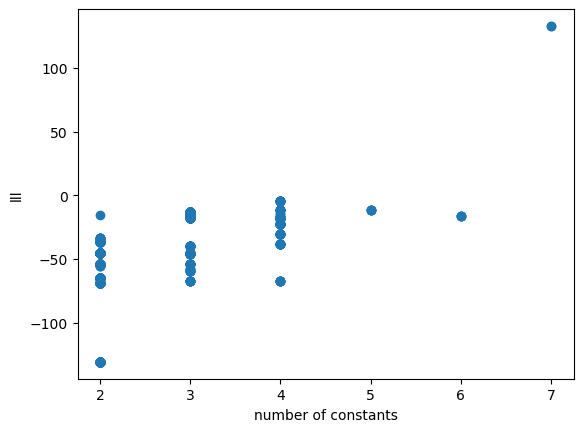

In [9]:
plt.scatter(t_eq['number_constants']+1,lll)
plt.xlabel('number of constants')
plt.ylabel('lll')
#plt.ylim(0,400)

Text(0, 0.5, 'aic')

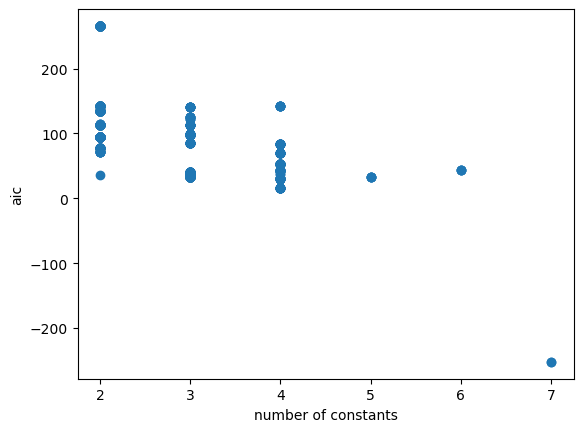

In [10]:
aic = -2*lll+2*(t_eq['number_constants']+1)
plt.scatter(t_eq['number_constants']+1,aic)
plt.xlabel('number of constants')
plt.ylabel('aic')

In [11]:
aic.argmin()

379

In [15]:
t_eq.iloc[aic.argmin()]['equation']

'(((3.1597743231772513 - ((((-5.867620697190853 + 0.8957817731622927) - log10(0.5744549736105595)) - x3) / ((3.5215444484562646 - ((x5 + x40) - exp(x42))) / 0.8957817731622927))) * x15) + x19)'

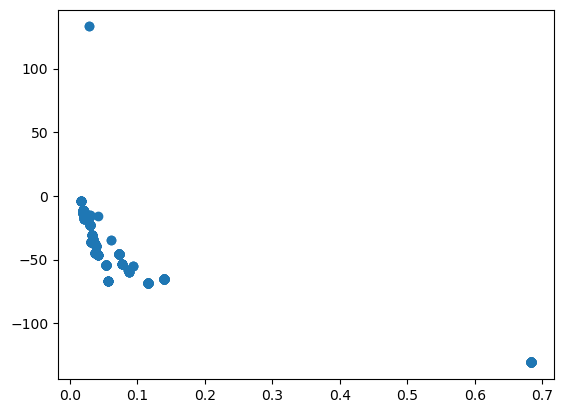

In [21]:
plt.scatter(t_eq['loss'],lll)

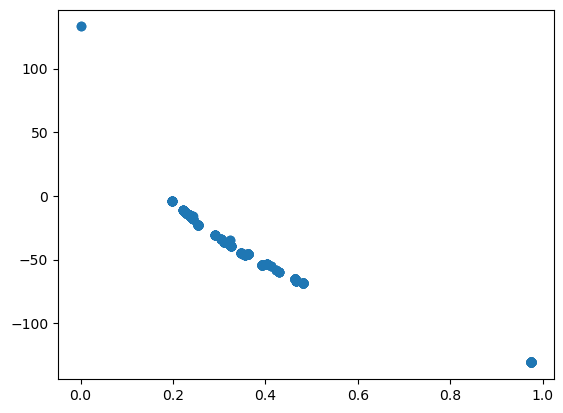

In [24]:
plt.scatter(intrinsic_scatter,lll)

Text(0, 0.5, 'aic')

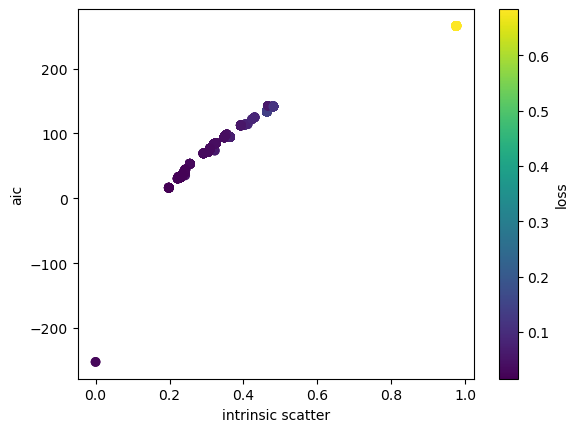

In [27]:
plt.scatter(intrinsic_scatter,aic,c=t_eq['loss'])
plt.colorbar(label='loss')
plt.xlabel('intrinsic scatter')
plt.ylabel('aic')

In [38]:
intrinsic_scatter.min()

nan

In [53]:
for i in range(len(labels)):
    print(labels[i],low_scatter_para[labels[i]])

3 Disk
5 Core
40 log_Rho_e_Exact_new
42 logRho_soi_approx_new
15 log_sigma0
19 log_n_sph_eq


In [34]:
equation= '(((3.1597743231772513 - ((((-5.867620697190853 + 0.8957817731622927) - log10(0.5744549736105595)) - x3) / ((3.5215444484562646 - ((x5 + x40) - exp(x42))) / 0.8957817731622927))) * x15) + x19)'
for key, value in swap_operator_list.items():
    equation = equation.replace(key, value)
func=eval("lambda "+", ".join(re.findall(r'\bx\d+', equation))+f": {equation}")

labels = re.findall(r'x(\d+)', equation)
labels = [int(label) for label in labels]

x=[]
for i in range(len(labels)):
    x.append(df[low_scatter_para[labels[i]]])

mu_pred=func(*x)
mu_obs = df['M_BH']
sigma_y = df['M_BH_std_sym']

Text(0, 0.5, 'mu_obs-mu_pred')

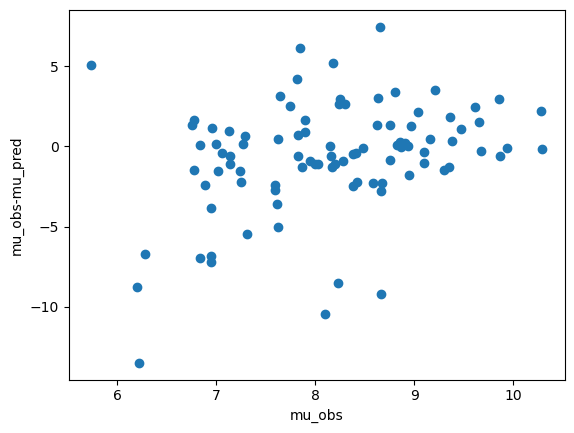

In [36]:
plt.scatter(mu_obs,(mu_obs-mu_pred)/sigma_y)
plt.xlabel('mu_obs')
plt.ylabel('mu_obs-mu_pred')